# SpykProps For Machine Learning

In [1]:
from SpykFunctions import *

## ROSEAU JON

In [7]:
images_path = r'.\CVATLabeling\PGRRoseau_JON\images\default'
Images = ListImages(images_path, imgformat=".tif", recursive=False)
Images.pop(-1)

masks_path = r'.\CVATLabeling\PGRRoseau_JON\masks'
Masks = ListImages(masks_path, imgformat=".tif", recursive=False)

In [19]:
# image_path = Images[0]
ResizeFactor = 8

def read_and_Resize(image_path, ResizeFactor = 8, mask=False):
    
    if mask==True:
        labeled_img = plt.imread(image_path)
        labeled_img = labeled_img.astype(np.uint8)
        labeled_img = labeled_img[:,:,0]
        # plt.imshow(labeled_img)
        kernel = np.ones((3,3), np.uint8)
        labeled_img = cv2.erode(labeled_img, kernel, iterations=1)
        im = Image.fromarray((labeled_img).astype(np.uint8))
    else:
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        # img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  
        im = Image.fromarray((img).astype(np.uint8))

    # Resize image 
    (width, height) = (im.width // ResizeFactor, im.height // ResizeFactor)
    resized_img = im.resize((width, height))
    resized_img = np.asarray(resized_img)
    
    return(resized_img)

# img = read_and_Resize(image_path, ResizeFactor = ResizeFactor, mask=False)

def add_labels(mask_path, MinSize=30, MaxSize=200):
    # MMinSize=30, MaxSize=200 was decided for ResizeFator=8
    resized_labeled_img = read_and_Resize(mask_path, ResizeFactor = 8, mask=True)
    
    # Detect connected components
    nb_components, output, stats, centroids = cv2.connectedComponentsWithStats(resized_labeled_img, connectivity=8)
    sizes = stats[1:, -1]; nb_components = nb_components - 1    

    resized_labeled_img = np.zeros((output.shape))
    unlabeled = np.zeros((output.shape))

    # Keep only objects with minimum size
    for i in range(0, nb_components):
        if sizes[i] >= MinSize and sizes[i] < MaxSize:
            resized_labeled_img[output == i + 1] = 1
        else:
            unlabeled[output == i + 1] = 1

    resized_labeled_img = np.uint8(resized_labeled_img)
    unlabeled = np.uint8(unlabeled)
    # plt.imshow(resized_labeled_img)
    labeled_img = resized_labeled_img
    
    return(labeled_img, unlabeled)

# labeled, unlabeled = add_labels(mask_path=Masks[0], MinSize=30, MaxSize=200)

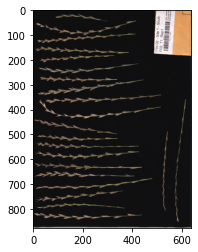

In [20]:
img = read_and_Resize(Images[0], ResizeFactor = ResizeFactor, mask=False)
plt.imshow(img)

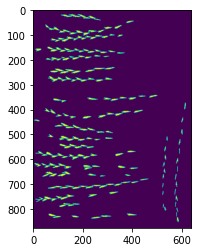

In [15]:
labeled, unlabeled = add_labels(mask_path=Masks[0], MinSize=30, MaxSize=200)
plt.imshow(labeled)


In [34]:
# Spike length
sl = spk_length(cropped_spklt, method='skelblur', Overlay=False, PlotCH=False)
# SpkLengths.append(sl)
sl

25

In [68]:
%%time
img_lab = color.rgb2lab(img)
img_gray = color.rgb2gray(img)
img_hsv = color.rgb2hsv(img)

I = [img,img_gray,img_lab,img_hsv,labeled]

df = SpikesDF(I=I, ImagePath=Images[0], RemoveBG=False, rm_envelope=False)

Wall time: 1.14 s


In [73]:
%%time

df_all = pd.DataFrame()

for i in range(0,len(Images)):
    img = read_and_Resize(Images[i], ResizeFactor = 8, mask=False)
    labeled, unlabeled = add_labels(mask_path=Masks[i], MinSize=30, MaxSize=200)
    img_lab = color.rgb2lab(img)
    img_gray = color.rgb2gray(img)
    img_hsv = color.rgb2hsv(img)
    I = [img,img_gray,img_lab,img_hsv,labeled]
    df = SpikesDF(I=I, ImagePath=Images[0], RemoveBG=False, rm_envelope=False)
    df_all = df_all.append(df)
               
    

Wall time: 23.2 s


In [70]:
df

Image_Name  Spike_Label  Area  MajorAxis  MinorAxes  \
0    JONPGR_ROSEAU2021__0001.tif            1   115  26.469676   5.737564   
1    JONPGR_ROSEAU2021__0001.tif            2   146  31.744183   6.118968   
2    JONPGR_ROSEAU2021__0001.tif            3   199  43.311114   7.246490   
3    JONPGR_ROSEAU2021__0001.tif            4   100  29.155159   4.734630   
4    JONPGR_ROSEAU2021__0001.tif            5   163  29.728090   7.368274   
..                           ...          ...   ...        ...        ...   
210  JONPGR_ROSEAU2021__0001.tif          211   177  40.653172   5.715262   
211  JONPGR_ROSEAU2021__0001.tif          212   131  27.877054   6.068689   
212  JONPGR_ROSEAU2021__0001.tif          213   134  32.476586   5.343264   
213  JONPGR_ROSEAU2021__0001.tif          214   159  38.154995   5.354491   
214  JONPGR_ROSEAU2021__0001.tif          215    94  20.246218   6.704195   

     Orientation  Eccentricity   Perimeter    Red_mean  Red_min  ...  \
0       1.444362      0.976225   56.935029   89.069565     13.0  ...   
1       1.232303      0.981246   68.248737   79.952055     11.0  ...   
2       1.412777      0.985904  107.420310   96.346734     14.0  ...   
3       1.551652      0.986726   59.313708   97.010000     29.0  ...   
4       1.262428      0.968797   66.041631   86.588957     12.0  ...   
..           ...           ...         ...         ...      ...  ...   
210     1.560824      0.990068   82.935029  115.587571     10.0  ...   
211     1.429421      0.976017   59.556349  122.938931     17.0  ...   
212    -1.434555      0.986373   65.727922  130.283582     30.0  ...   
213    -1.447224      0.990104   76.349242  131.735849     14.0  ...   
214     0.187829      0.943584   52.935029  126.531915     24.0  ...   

        S_Min     S_Max     V_p25     V_p50     V_p75    V_Mean      V_sd  \
0    0.062500  0.475000  0.245098  0.403922  0.472549  0.357988  0.148134   
1    0.045455  0.461538  0.146078  0.356863  0.466667  0.319312  0.171848   
2    0.050000  0.409091  0.284314  0.403922  0.480392  0.383920  0.143485   
3    0.075472  0.428571  0.269608  0.392157  0.479412  0.385608  0.143812   
4    0.050000  0.537500  0.213725  0.372549  0.474510  0.341946  0.162311   
..        ...       ...       ...       ...       ...       ...       ...   
210  0.041667  0.450980  0.266667  0.505882  0.647059  0.455146  0.227300   
211  0.050000  0.474747  0.296078  0.545098  0.666667  0.482802  0.219689   
212  0.163636  0.476923  0.405882  0.564706  0.631373  0.511033  0.163938   
213  0.125000  0.492308  0.394118  0.568627  0.662745  0.516808  0.167529   
214  0.027027  0.395683  0.393137  0.529412  0.629412  0.496204  0.186176   

        V_Min     V_Max  Circularity  
0    0.050980  0.619608     0.445809  
1    0.047059  0.615686     0.393889  
2    0.058824  0.694118     0.216716  
3    0.113725  0.749020     0.357190  
4    0.054902  0.654902     0.469637  
..        ...       ...          ...  
210  0.050980  0.800000     0.323376  
211  0.070588  0.847059     0.464114  
212  0.117647  0.745098     0.389776  
213  0.066667  0.764706     0.342766  
214  0.094118  0.780392     0.421552  

[215 rows x 113 columns]